# SPX, VIX and VIX Futures

The goal is to determine how the VIX futures curve behaves in market selloffs (a market
selloff is when the S&P 500 Index drops in value).

First, let's start importing all libraries used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [3]:
data=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/12. Summer Applications/03. Summer 2019/' \
                 '36. Arc Stone Capital Management - Quantitative Research Intern/Internship_Exercise/data.csv')

Expiry_Dates=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/12. Summer Applications/03. Summer 2019/' \
                 '36. Arc Stone Capital Management - Quantitative Research Intern/Internship_Exercise/Expiry_Dates.csv', header=None)

First, let's take a quick look on both datasets

### Dataset: 'data'

In [4]:
print("Shape: %s" % str(data.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(data.columns))
print("------------------------------------------------------------------")
str(data.info())
print('------------------------------------------------------------------')
print(data.describe())
print('------------------------------------------------------------------')
print(data.dtypes)
print('------------------------------------------------------------------')
data.head()

Shape: (70357, 7)
------------------------------------------------------------------
Column names: Index(['Unnamed: 0', 'date', 'm_localSymbol', 'open', 'high', 'low', 'close'], dtype='object')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70357 entries, 0 to 70356
Data columns (total 7 columns):
Unnamed: 0       70357 non-null int64
date             70357 non-null object
m_localSymbol    70357 non-null object
open             70357 non-null float64
high             70357 non-null float64
low              70357 non-null float64
close            70357 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.2+ MB
------------------------------------------------------------------
         Unnamed: 0          open          high           low         close
count  70357.000000  70357.000000  70357.000000  70357.000000  70357.000000
mean   35178.000000    200.613647    200.838024    200.392198    200.61807

,Unnamed: 0,date,m_localSymbol,open,high,low,close
0,0,2015-12-31 09:30:00,SPX,2059.95,2059.95,2050.51,2053.00
1,1,2015-12-31 09:30:00,VIX,17.97,18.19,17.81,17.95
2,2,2015-12-31 10:00:00,SPX,2053.00,2053.47,2049.13,2049.59
3,3,2015-12-31 10:00:00,VIX,17.95,18.29,17.86,18.28
4,4,2015-12-31 10:30:00,SPX,2049.59,2049.59,2046.31,2048.95


Dataset: 'Expiry_Dates'

In [5]:
print("Shape: %s" % str(Expiry_Dates.shape))
print("------------------------------------------------------------------")
print("Column names: %s" % str(Expiry_Dates.columns))
print("------------------------------------------------------------------")
str(Expiry_Dates.info())
print('------------------------------------------------------------------')
print(Expiry_Dates.describe())
print('------------------------------------------------------------------')
print(Expiry_Dates.dtypes)
print('------------------------------------------------------------------')
Expiry_Dates.head()

Shape: (96, 2)
------------------------------------------------------------------
Column names: Int64Index([0, 1], dtype='int64')
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
0    96 non-null object
1    96 non-null object
dtypes: object(2)
memory usage: 808.0+ bytes
------------------------------------------------------------------
           0          1
count     96         96
unique    96         96
top     VXJ3  7/22/2015
freq       1          1
------------------------------------------------------------------
0    object
1    object
dtype: object
------------------------------------------------------------------


,0,1
0,VXF1,1/19/2011
1,VXF2,1/18/2012
2,VXF3,1/16/2013
3,VXF4,1/22/2014
4,VXF5,1/21/2015


Since 'Expiry_Dates' has no column names, let's define names

In [6]:
#Defining column names
Expiry_Dates.columns = ['ticker_expiration','date_expiration']

Now, the dataset 'data' has pretty much all the information. Since dates are important, let's Verify the type of dates I have in my 'data' dataset

### All tickers

We need to know all the indexes we have in this dataset.

In [7]:
tickers=data['m_localSymbol'].unique()
print(tickers)

['SPX' 'VIX' 'VXQ6' 'VXK6' 'VXF6' 'VXM6' 'VXH6' 'VXN6' 'VXG6' 'VXU6'
 'VXJ6' 'VXV6' 'VXX6' 'VXZ6' 'VXF7' 'VXG7' 'VXH7' 'VXJ7' 'VXK7' 'VXM7'
 'VXN7' 'VXQ7' 'VXU7' 'VXV7' 'VXX7' 'VXZ7' 'VXF8' 'VXG8' 'VXH8' 'VXJ8'
 'VXK8' 'VXM8' 'VXN8']


In [8]:
print(data['date'].dtype)
data['date'] = data['date'].values.astype('<M8[D]')

object


So, I changed to format '<M8[D]' to consider only days info (disregarding time)

## Creating new DataFrames for 'VIX', 'SPX' and VIX Futures

In [9]:
data_VIX = data.loc[data['m_localSymbol']=='VIX']
data_SPX = data.loc[data['m_localSymbol']=='SPX']
data_VXF6 = data.loc[data['m_localSymbol']=='VXF6']
data_VXF7 = data.loc[data['m_localSymbol']=='VXF7']
data_VXF8 = data.loc[data['m_localSymbol']=='VXF8']
data_VXG6 = data.loc[data['m_localSymbol']=='VXG6']
data_VXG7 = data.loc[data['m_localSymbol']=='VXG7']
data_VXG8 = data.loc[data['m_localSymbol']=='VXG8']
data_VXH6 = data.loc[data['m_localSymbol']=='VXH6']
data_VXH7 = data.loc[data['m_localSymbol']=='VXH7']
data_VXH8 = data.loc[data['m_localSymbol']=='VXH8']
data_VXJ6 = data.loc[data['m_localSymbol']=='VXJ6']
data_VXJ7 = data.loc[data['m_localSymbol']=='VXJ7']
data_VXJ8 = data.loc[data['m_localSymbol']=='VXJ8']
data_VXK6 = data.loc[data['m_localSymbol']=='VXK6']
data_VXK7 = data.loc[data['m_localSymbol']=='VXK7']
data_VXK8 = data.loc[data['m_localSymbol']=='VXK8']
data_VXM6 = data.loc[data['m_localSymbol']=='VXM6']
data_VXM7 = data.loc[data['m_localSymbol']=='VXM7']
data_VXM8 = data.loc[data['m_localSymbol']=='VXM8']
data_VXN6 = data.loc[data['m_localSymbol']=='VXN6']
data_VXN7 = data.loc[data['m_localSymbol']=='VXN7']
data_VXN8 = data.loc[data['m_localSymbol']=='VXN8']
data_VXQ6 = data.loc[data['m_localSymbol']=='VXQ6']
data_VXQ7 = data.loc[data['m_localSymbol']=='VXQ7']
data_VXU6 = data.loc[data['m_localSymbol']=='VXU6']
data_VXU7 = data.loc[data['m_localSymbol']=='VXU7']
data_VXV6 = data.loc[data['m_localSymbol']=='VXV6']
data_VXV7 = data.loc[data['m_localSymbol']=='VXV7']
data_VXX6 = data.loc[data['m_localSymbol']=='VXX6']
data_VXX7 = data.loc[data['m_localSymbol']=='VXX7']
data_VXZ6 = data.loc[data['m_localSymbol']=='VXZ6']
data_VXZ7 = data.loc[data['m_localSymbol']=='VXZ7']

### Creating lists object with all the indexes (SPX, VIX and VIX Futures) - they will be useful later on

In [10]:
data_tickers_list= [data_VIX, data_VXF6, data_VXF7, data_VXF8,
                    data_VXG6, data_VXG7, data_VXG8, data_VXH6,
                    data_VXH7, data_VXH8, data_VXJ6, data_VXJ7,
                    data_VXJ8, data_VXK6, data_VXK7, data_VXK8,
                    data_VXM6, data_VXM7, data_VXM8, data_VXN6,
                    data_VXN7, data_VXN8, data_VXQ6, data_VXQ7,
                    data_VXU6, data_VXU7, data_VXV6, data_VXV7,
                    data_VXX6, data_VXX7, data_VXZ6, data_VXZ7]

data_tickers_list_names = [ 'data_VIX', 'data_VXF6', 'data_VXF7', 'data_VXF8',
                            'data_VXG6', 'data_VXG7', 'data_VXG8', 'data_VXH6',
                            'data_VXH7', 'data_VXH8', 'data_VXJ6', 'data_VXJ7',
                            'data_VXJ8', 'data_VXK6', 'data_VXK7', 'data_VXK8',
                            'data_VXM6', 'data_VXM7', 'data_VXM8', 'data_VXN6',
                            'data_VXN7', 'data_VXN8', 'data_VXQ6', 'data_VXQ7',
                            'data_VXU6', 'data_VXU7', 'data_VXV6', 'data_VXV7',
                            'data_VXX6', 'data_VXX7', 'data_VXZ6', 'data_VXZ7']

### Converting all Time Series to Daily

In [11]:
data_SPX.index = pd.to_datetime(data_SPX['date'])
data_SPX = data_SPX.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_SPX = data_SPX.dropna()

data_VIX.index = pd.to_datetime(data_VIX['date'])
data_VIX = data_VIX.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VIX = data_VIX.dropna()

data_VXQ6.index = pd.to_datetime(data_VXQ6['date'])
data_VXQ6 = data_VXQ6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXQ6 = data_VXQ6.dropna()

data_VXK6.index = pd.to_datetime(data_VXK6['date'])
data_VXK6 = data_VXK6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXK6 = data_VXK6.dropna()

data_VXF6.index = pd.to_datetime(data_VXF6['date'])
data_VXF6 = data_VXF6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXF6 = data_VXF6.dropna()

data_VXM6.index = pd.to_datetime(data_VXM6['date'])
data_VXM6 = data_VXM6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXM6 = data_VXM6.dropna()

data_VXH6.index = pd.to_datetime(data_VXH6['date'])
data_VXH6 = data_VXH6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXH6 = data_VXH6.dropna()

data_VXN6.index = pd.to_datetime(data_VXN6['date'])
data_VXN6 = data_VXN6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXN6 = data_VXN6.dropna()

data_VXG6.index = pd.to_datetime(data_VXG6['date'])
data_VXG6 = data_VXG6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXG6 = data_VXG6.dropna()

data_VXU6.index = pd.to_datetime(data_VXU6['date'])
data_VXU6 = data_VXU6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXU6 = data_VXU6.dropna()

data_VXJ6.index = pd.to_datetime(data_VXJ6['date'])
data_VXJ6 = data_VXJ6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXJ6 = data_VXJ6.dropna()

data_VXV6.index = pd.to_datetime(data_VXV6['date'])
data_VXV6 = data_VXV6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXV6 = data_VXV6.dropna()

data_VXX6.index = pd.to_datetime(data_VXX6['date'])
data_VXX6 = data_VXX6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXX6 = data_VXX6.dropna()

data_VXZ6.index = pd.to_datetime(data_VXZ6['date'])
data_VXZ6 = data_VXZ6.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXZ6 = data_VXZ6.dropna()

data_VXF7.index = pd.to_datetime(data_VXF7['date'])
data_VXF7 = data_VXF7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXF7 = data_VXF7.dropna()

data_VXG7.index = pd.to_datetime(data_VXG7['date'])
data_VXG7 = data_VXG7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXG7 = data_VXG7.dropna()

data_VXH7.index = pd.to_datetime(data_VXH7['date'])
data_VXH7 = data_VXH7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXH7 = data_VXH7.dropna()

data_VXJ7.index = pd.to_datetime(data_VXJ7['date'])
data_VXJ7 = data_VXJ7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXJ7 = data_VXJ7.dropna()

data_VXK7.index = pd.to_datetime(data_VXK7['date'])
data_VXK7 = data_VXK7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXK7 = data_VXK7.dropna()

data_VXM7.index = pd.to_datetime(data_VXM7['date'])
data_VXM7 = data_VXM7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXM7 = data_VXM7.dropna()

data_VXN7.index = pd.to_datetime(data_VXN7['date'])
data_VXN7 = data_VXN7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXN7 = data_VXN7.dropna()

data_VXQ7.index = pd.to_datetime(data_VXQ7['date'])
data_VXQ7 = data_VXQ7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXQ7 = data_VXQ7.dropna()

data_VXU7.index = pd.to_datetime(data_VXU7['date'])
data_VXU7 = data_VXU7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXU7 = data_VXU7.dropna()

data_VXV7.index = pd.to_datetime(data_VXV7['date'])
data_VXV7 = data_VXV7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXV7 = data_VXV7.dropna()

data_VXX7.index = pd.to_datetime(data_VXX7['date'])
data_VXX7 = data_VXX7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXX7 = data_VXX7.dropna()

data_VXZ7.index = pd.to_datetime(data_VXZ7['date'])
data_VXZ7 = data_VXZ7.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXZ7 = data_VXZ7.dropna()

data_VXF8.index = pd.to_datetime(data_VXF8['date'])
data_VXF8 = data_VXF8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXF8 = data_VXF8.dropna()

data_VXG8.index = pd.to_datetime(data_VXG8['date'])
data_VXG8 = data_VXG8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXG8 = data_VXG8.dropna()

data_VXH8.index = pd.to_datetime(data_VXH8['date'])
data_VXH8 = data_VXH8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXH8 = data_VXH8.dropna()

data_VXJ8.index = pd.to_datetime(data_VXJ8['date'])
data_VXJ8 = data_VXJ8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXJ8 = data_VXJ8.dropna()

data_VXK8.index = pd.to_datetime(data_VXK8['date'])
data_VXK8 = data_VXK8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXK8 = data_VXK8.dropna()

data_VXM8.index = pd.to_datetime(data_VXM8['date'])
data_VXM8 = data_VXM8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXM8 = data_VXM8.dropna()

data_VXN8.index = pd.to_datetime(data_VXN8['date'])
data_VXN8 = data_VXN8.resample('D').apply({'open':  'first', 'high':  'max', 'low':   'min', 'close': 'last'})
data_VXN8 = data_VXN8.dropna()


## Plotting

Let's take a look on the plots of all indexes over time

## (1) A panel with plots - each plot represent one index (SPX, VIX or VIX Futures) over time

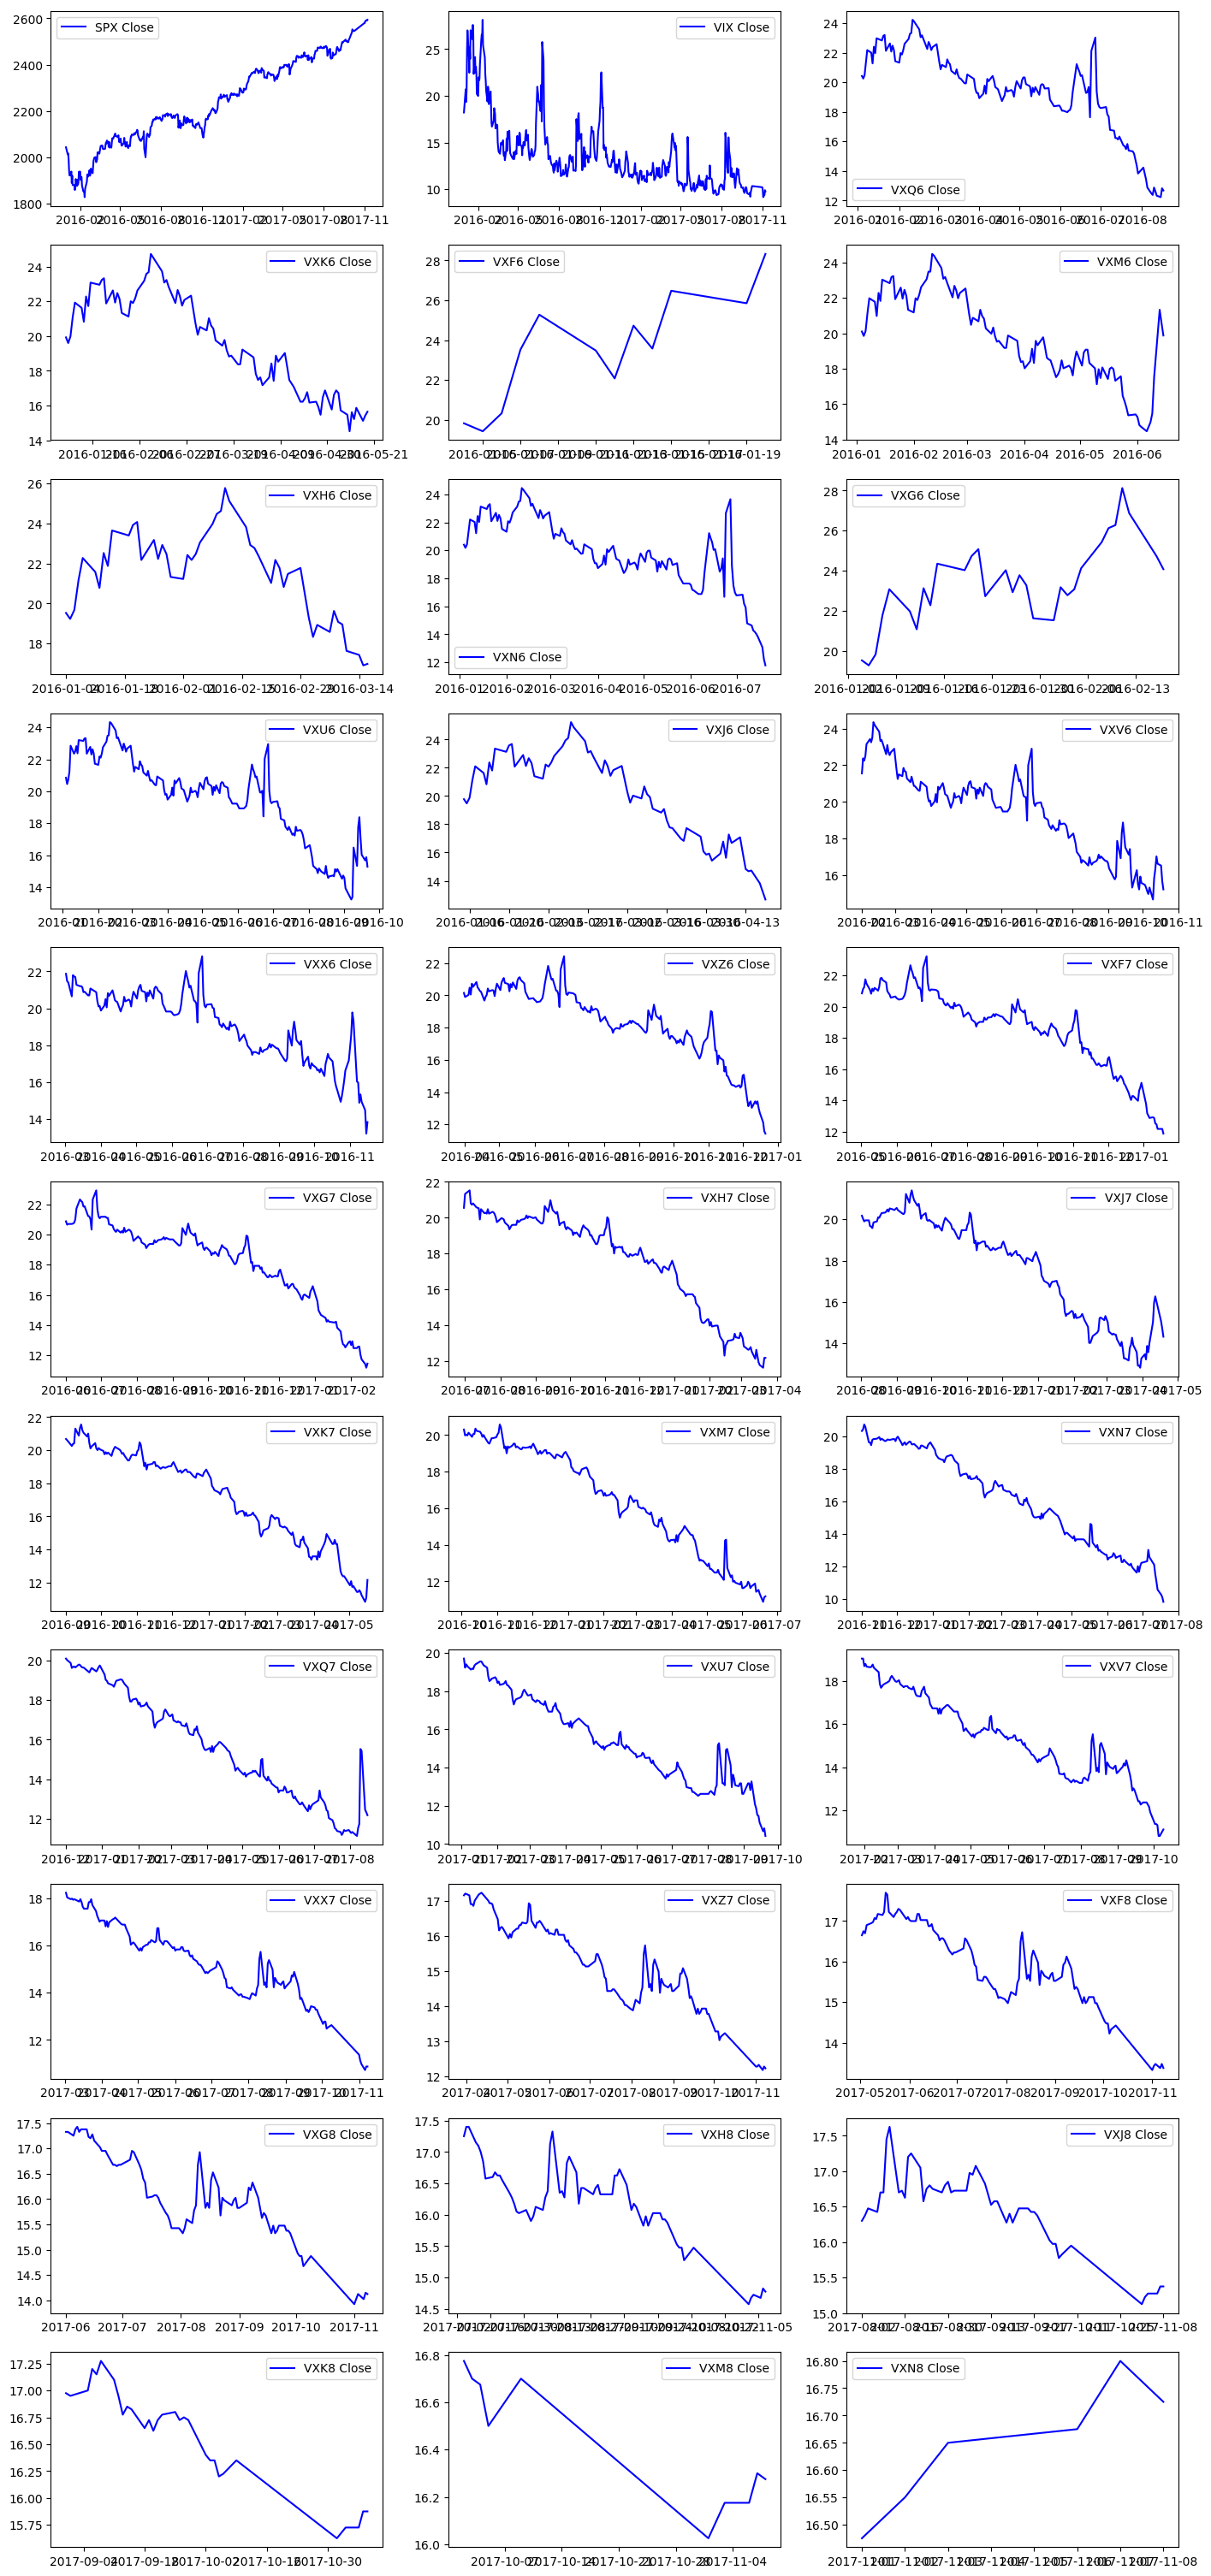

In [12]:
#plt.style.use('fivethirtyeight')
plt.style.use('default')

fig, axs = plt.subplots(11, 3, sharey=False, sharex=False, tight_layout=False, figsize=(17,11*3.5))
axs[0,0].plot(data_SPX.index, data_SPX['close'], 'b-', label='SPX Close')
axs[0,1].plot(data_VIX.index, data_VIX['close'], 'b-', label='VIX Close')
axs[0,2].plot(data_VXQ6.index, data_VXQ6['close'], 'b-', label='VXQ6 Close')

axs[1,0].plot(data_VXK6.index, data_VXK6['close'], 'b-', label='VXK6 Close')
axs[1,1].plot(data_VXF6.index, data_VXF6['close'], 'b-', label='VXF6 Close')
axs[1,2].plot(data_VXM6.index, data_VXM6['close'], 'b-', label='VXM6 Close')

axs[2,0].plot(data_VXH6.index, data_VXH6['close'], 'b-', label='VXH6 Close')
axs[2,1].plot(data_VXN6.index, data_VXN6['close'], 'b-', label='VXN6 Close')
axs[2,2].plot(data_VXG6.index, data_VXG6['close'], 'b-', label='VXG6 Close')

axs[3,0].plot(data_VXU6.index, data_VXU6['close'], 'b-', label='VXU6 Close')
axs[3,1].plot(data_VXJ6.index, data_VXJ6['close'], 'b-', label='VXJ6 Close')
axs[3,2].plot(data_VXV6.index, data_VXV6['close'], 'b-', label='VXV6 Close')

axs[4,0].plot(data_VXX6.index, data_VXX6['close'], 'b-', label='VXX6 Close')
axs[4,1].plot(data_VXZ6.index, data_VXZ6['close'], 'b-', label='VXZ6 Close')
axs[4,2].plot(data_VXF7.index, data_VXF7['close'], 'b-', label='VXF7 Close')

axs[5,0].plot(data_VXG7.index, data_VXG7['close'], 'b-', label='VXG7 Close')
axs[5,1].plot(data_VXH7.index, data_VXH7['close'], 'b-', label='VXH7 Close')
axs[5,2].plot(data_VXJ7.index, data_VXJ7['close'], 'b-', label='VXJ7 Close')

axs[6,0].plot(data_VXK7.index, data_VXK7['close'], 'b-', label='VXK7 Close')
axs[6,1].plot(data_VXM7.index, data_VXM7['close'], 'b-', label='VXM7 Close')
axs[6,2].plot(data_VXN7.index, data_VXN7['close'], 'b-', label='VXN7 Close')

axs[7,0].plot(data_VXQ7.index, data_VXQ7['close'], 'b-', label='VXQ7 Close')
axs[7,1].plot(data_VXU7.index, data_VXU7['close'], 'b-', label='VXU7 Close')
axs[7,2].plot(data_VXV7.index, data_VXV7['close'], 'b-', label='VXV7 Close')

axs[8,0].plot(data_VXX7.index, data_VXX7['close'], 'b-', label='VXX7 Close')
axs[8,1].plot(data_VXZ7.index, data_VXZ7['close'], 'b-', label='VXZ7 Close')
axs[8,2].plot(data_VXF8.index, data_VXF8['close'], 'b-', label='VXF8 Close')

axs[9,0].plot(data_VXG8.index, data_VXG8['close'], 'b-', label='VXG8 Close')
axs[9,1].plot(data_VXH8.index, data_VXH8['close'], 'b-', label='VXH8 Close')
axs[9,2].plot(data_VXJ8.index, data_VXJ8['close'], 'b-', label='VXJ8 Close')

axs[10,0].plot(data_VXK8.index, data_VXK8['close'], 'b-', label='VXK8 Close')
axs[10,1].plot(data_VXM8.index, data_VXM8['close'], 'b-', label='VXM8 Close')
axs[10,2].plot(data_VXN8.index, data_VXN8['close'], 'b-', label='VXN8 Close')

axs[0,0].legend(loc='best')
axs[0,1].legend(loc='best')
axs[0,2].legend(loc='best')

axs[1,0].legend(loc='best')
axs[1,1].legend(loc='best')
axs[1,2].legend(loc='best')

axs[2,0].legend(loc='best')
axs[2,1].legend(loc='best')
axs[2,2].legend(loc='best')

axs[3,0].legend(loc='best')
axs[3,1].legend(loc='best')
axs[3,2].legend(loc='best')

axs[4,0].legend(loc='best')
axs[4,1].legend(loc='best')
axs[4,2].legend(loc='best')

axs[5,0].legend(loc='best')
axs[5,1].legend(loc='best')
axs[5,2].legend(loc='best')

axs[6,0].legend(loc='best')
axs[6,1].legend(loc='best')
axs[6,2].legend(loc='best')

axs[7,0].legend(loc='best')
axs[7,1].legend(loc='best')
axs[7,2].legend(loc='best')

axs[8,0].legend(loc='best')
axs[8,1].legend(loc='best')
axs[8,2].legend(loc='best')

axs[9,0].legend(loc='best')
axs[9,1].legend(loc='best')
axs[9,2].legend(loc='best')

axs[10,0].legend(loc='best')
axs[10,1].legend(loc='best')
axs[10,2].legend(loc='best')
plt.show()

## (2) Plotting all indexes (SPX, VIX or VIX Futures) in the same plot over time

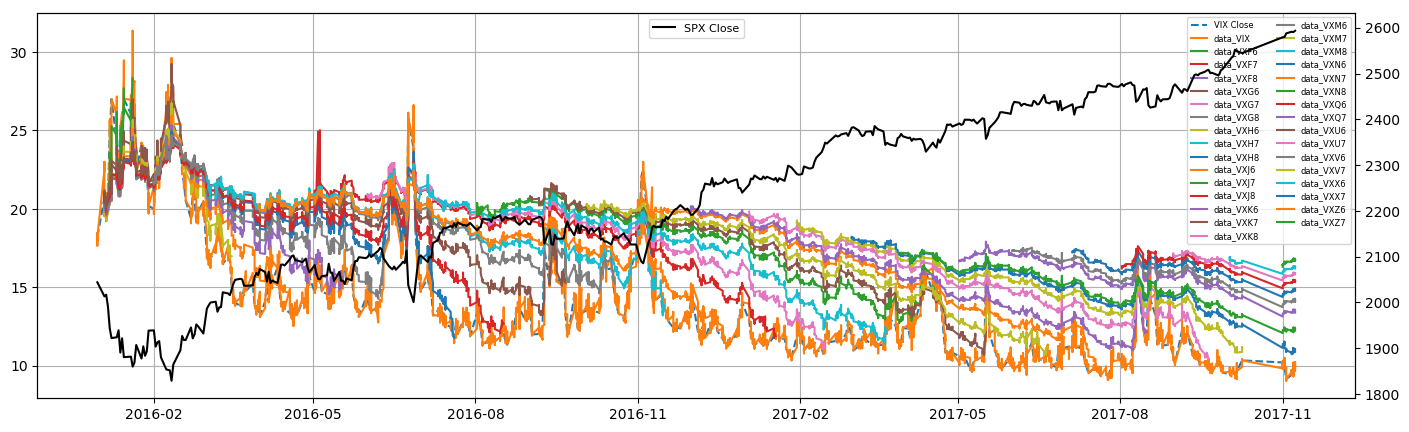

In [13]:
h=0
plt.style.use('default')
fig, ax1 = plt.subplots(1, sharey=False, tight_layout=False, figsize=(17,5))
ax1.plot(data_VIX.index, data_VIX['close'], label='VIX Close', ls='--')
for df in data_tickers_list:
    ax1.plot(df.index, df['close'], label=data_tickers_list_names[h])
    h=h+1
    
ax1.legend(loc='upper right', ncol=2, prop={'size': 6})
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(data_SPX.index, data_SPX['close'], label='SPX Close', c=(0,0,0))
ax2.legend(loc='upper center', prop={'size': 8})
plt.show()

### Calculating the returns of SPX

In [14]:
daily_return_close = pd.DataFrame(data_SPX['close'].pct_change(1))
daily_return_close.columns = ['returns_close']
data_SPX = pd.merge(data_SPX, daily_return_close, left_index=True,right_index=True)
#data_SPX.iloc[[0], [4]]=0

### Plotting the histogram of the SPX returns

(array([  1.,   0.,   0.,   0.,   3.,   1.,   4.,   1.,   6.,   9.,  16.,
         13.,  37., 110., 105.,  57.,  38.,  18.,   7.,   9.,   6.,   2.,
          1.,   1.,   1.]),
 array([-3.58075875e-02, -3.32501856e-02, -3.06927838e-02, -2.81353819e-02,
        -2.55779801e-02, -2.30205782e-02, -2.04631764e-02, -1.79057745e-02,
        -1.53483727e-02, -1.27909708e-02, -1.02335690e-02, -7.67616715e-03,
        -5.11876531e-03, -2.56136346e-03, -3.96161390e-06,  2.55344023e-03,
         5.11084208e-03,  7.66824392e-03,  1.02256458e-02,  1.27830476e-02,
         1.53404495e-02,  1.78978513e-02,  2.04552532e-02,  2.30126550e-02,
         2.55700568e-02,  2.81274587e-02]),
 <a list of 25 Patch objects>)

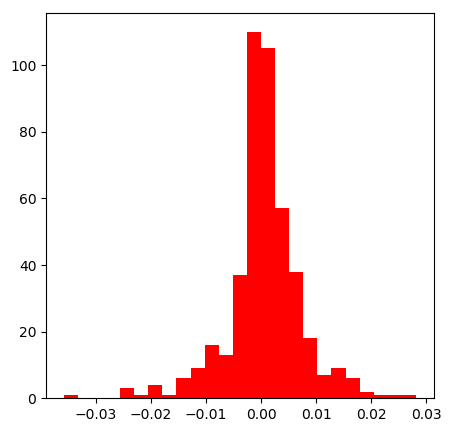

In [15]:
fig, axs = plt.subplots(1, figsize=(5,5))
axs.hist(data_SPX.ix[1:len(data_SPX),'returns_close'], bins=25, color='red')

Now, to define what we consider the threshold for a market selloff, we decided to use the 2.5% percentile, using the quantile function. The reason is simple, any threshold would be arbitrary. Doing so, we guarantee that we will have 2.5% of datapoints for our estimations. Easily, we can change this threshold and re-run all the code to get some different results.

In [16]:
data_SPX['returns_close'].quantile(0.025)

-0.015041376424335215

The 2.5% quantile give us -0.01503559917857245. Therefore, I will set a market selloff=-0.015, i.e., whenever the SPX falls 1.5% or more in a single day

In [17]:
mkt_selloff = -0.015

In [18]:
market_selloff_days = data_SPX[data_SPX['returns_close']<=-0.015]
market_selloff_days.index

DatetimeIndex(['2016-01-04', '2016-01-07', '2016-01-13', '2016-01-15',
               '2016-01-25', '2016-02-02', '2016-02-05', '2016-06-24',
               '2016-06-27', '2016-09-09', '2017-05-17', '2017-08-17'],
              dtype='datetime64[ns]', name='date', freq=None)

Therefore, we have only 12 days in our sample in which the SPX fell 1.5% or more in a single day

## Calculating the daily returns of all VIX and VIX Futures

In [19]:
data_VIX = pd.merge(data_VIX, pd.DataFrame(data_VIX['close'].pct_change(1)), left_index=True, right_index=True)
data_VXF6 = pd.merge(data_VXF6, pd.DataFrame(data_VXF6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXF7 = pd.merge(data_VXF7, pd.DataFrame(data_VXF7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXF8 = pd.merge(data_VXF8, pd.DataFrame(data_VXF8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXG6 = pd.merge(data_VXG6, pd.DataFrame(data_VXG6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXG7 = pd.merge(data_VXG7, pd.DataFrame(data_VXG7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXG8 = pd.merge(data_VXG8, pd.DataFrame(data_VXG8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXH6 = pd.merge(data_VXH6, pd.DataFrame(data_VXH6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXH7 = pd.merge(data_VXH7, pd.DataFrame(data_VXH7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXH8 = pd.merge(data_VXH8, pd.DataFrame(data_VXH8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXJ6 = pd.merge(data_VXJ6, pd.DataFrame(data_VXJ6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXJ7 = pd.merge(data_VXJ7, pd.DataFrame(data_VXJ7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXJ8 = pd.merge(data_VXJ8, pd.DataFrame(data_VXJ8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXK6 = pd.merge(data_VXK6, pd.DataFrame(data_VXK6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXK7 = pd.merge(data_VXK7, pd.DataFrame(data_VXK7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXK8 = pd.merge(data_VXK8, pd.DataFrame(data_VXK8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXM6 = pd.merge(data_VXM6, pd.DataFrame(data_VXM6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXM7 = pd.merge(data_VXM7, pd.DataFrame(data_VXM7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXM8 = pd.merge(data_VXM8, pd.DataFrame(data_VXM8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXN6 = pd.merge(data_VXN6, pd.DataFrame(data_VXN6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXN7 = pd.merge(data_VXN7, pd.DataFrame(data_VXN7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXN8 = pd.merge(data_VXN8, pd.DataFrame(data_VXN8['close'].pct_change(1)), left_index=True, right_index=True)
data_VXQ6 = pd.merge(data_VXQ6, pd.DataFrame(data_VXQ6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXQ7 = pd.merge(data_VXQ7, pd.DataFrame(data_VXQ7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXU6 = pd.merge(data_VXU6, pd.DataFrame(data_VXU6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXU7 = pd.merge(data_VXU7, pd.DataFrame(data_VXU7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXV6 = pd.merge(data_VXV6, pd.DataFrame(data_VXV6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXV7 = pd.merge(data_VXV7, pd.DataFrame(data_VXV7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXX6 = pd.merge(data_VXX6, pd.DataFrame(data_VXX6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXX7 = pd.merge(data_VXX7, pd.DataFrame(data_VXX7['close'].pct_change(1)), left_index=True, right_index=True)
data_VXZ6 = pd.merge(data_VXZ6, pd.DataFrame(data_VXZ6['close'].pct_change(1)), left_index=True, right_index=True)
data_VXZ7 = pd.merge(data_VXZ7, pd.DataFrame(data_VXZ7['close'].pct_change(1)), left_index=True, right_index=True)

### Updating data_tickers_list

In [20]:
data_tickers_list= [data_VIX, data_VXF6, data_VXF7, data_VXF8,
                    data_VXG6, data_VXG7, data_VXG8, data_VXH6,
                    data_VXH7, data_VXH8, data_VXJ6, data_VXJ7,
                    data_VXJ8, data_VXK6, data_VXK7, data_VXK8,
                    data_VXM6, data_VXM7, data_VXM8, data_VXN6,
                    data_VXN7, data_VXN8, data_VXQ6, data_VXQ7,
                    data_VXU6, data_VXU7, data_VXV6, data_VXV7,
                    data_VXX6, data_VXX7, data_VXZ6, data_VXZ7]

# Analysis

My goal in this section is to understand:
    
Model 1 - The behavior of the VIX Index vs. the behavior of the SPX index.
Model 2 - The behavior of the VIX futures price movements vs. VIX index levels and time to maturity

# Model 1

## (1) Analysis - Behavior of VIX and VIX Futures for the same day of a market selloff

### Plotting the SPX returns on x-axis and VIX & VIX Futures returns on the y-axis for the days in which the SPX had a selloff (threshhold defined above)

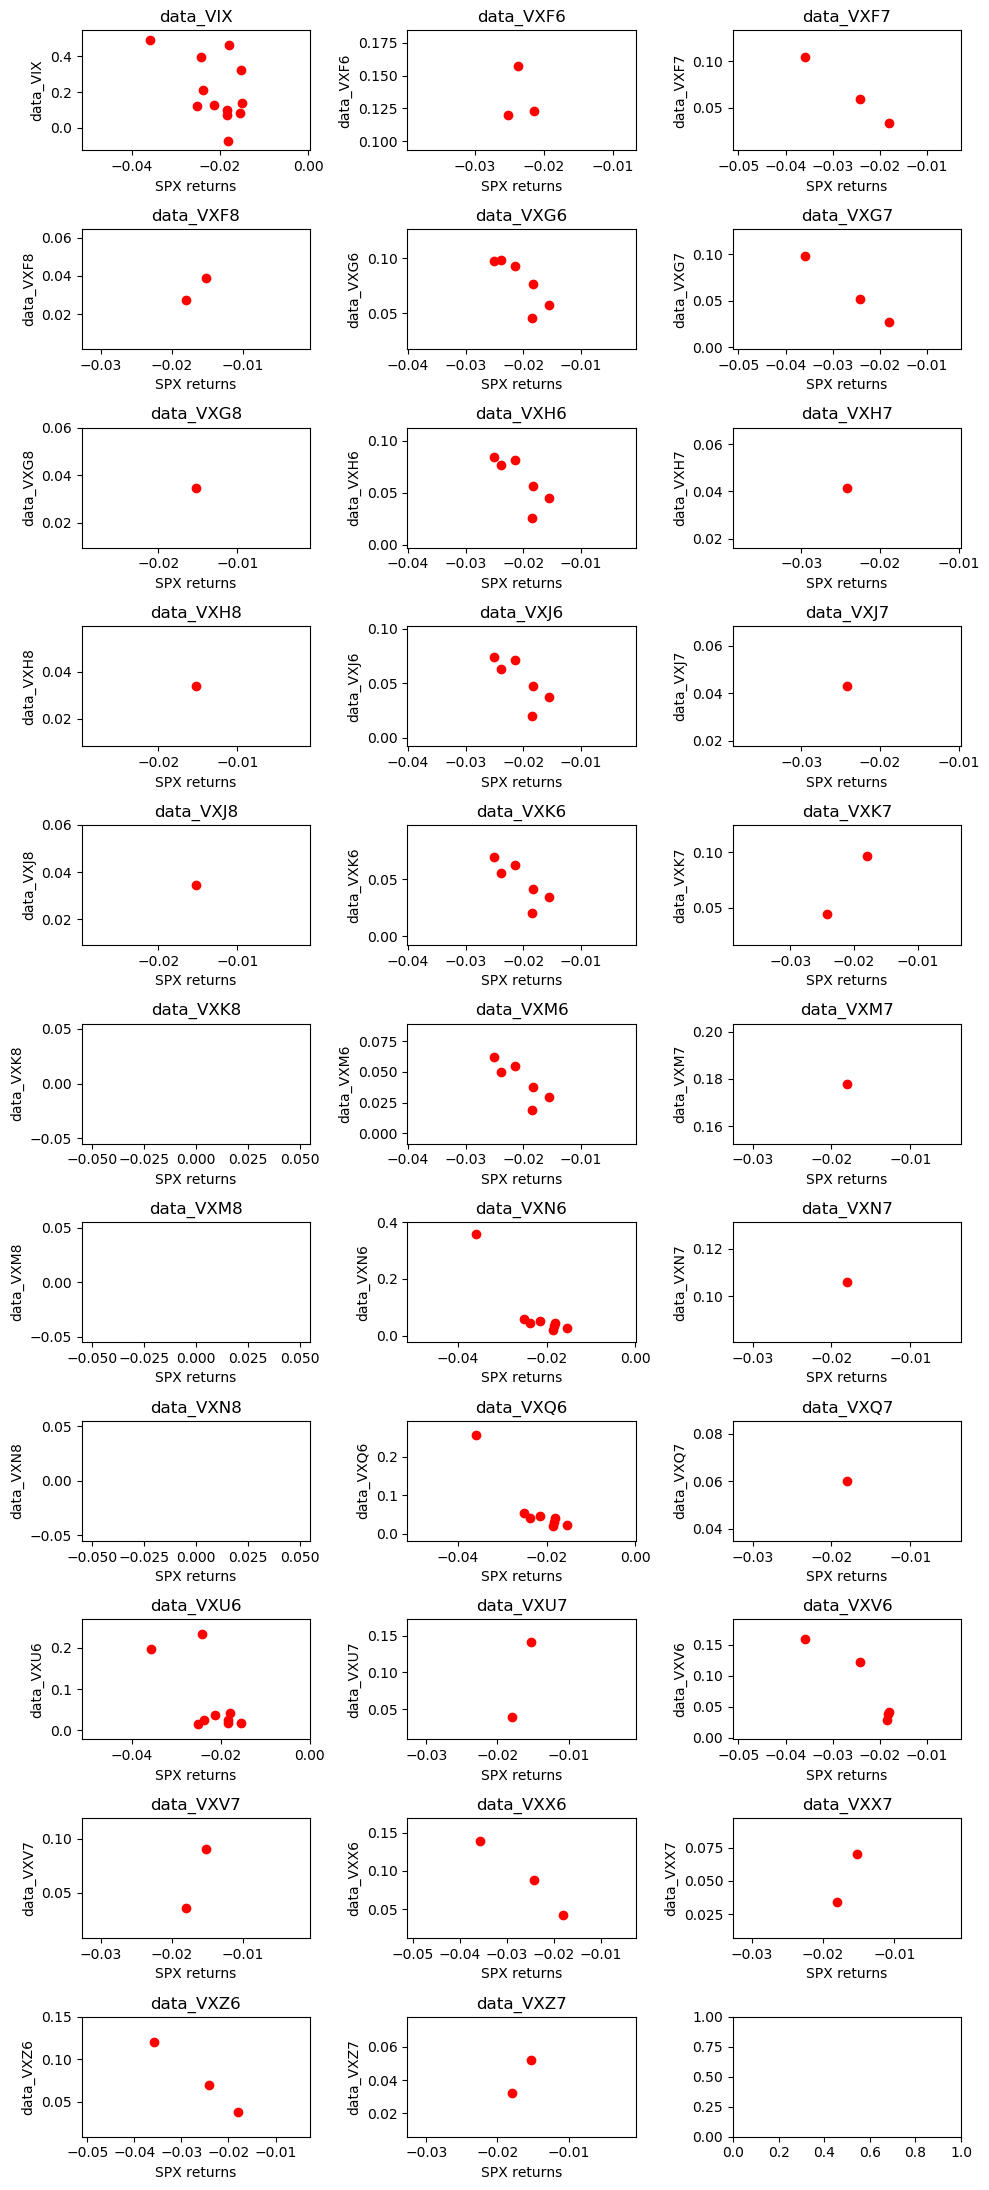

In [21]:
i=0
j=0
h=0
plt.style.use('default')
fig, axs = plt.subplots(11, 3, sharey=False, tight_layout=True, squeeze=False, figsize=(10,11*2))
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days.index)]['close_y']
    Y = Y.dropna()
    X = data_SPX[data_SPX.index.isin(Y.index)]['returns_close']
    axs[i,j].scatter(X,Y, c='red')
    axs[i,j].set(title=data_tickers_list_names[h],
                 ylabel=data_tickers_list_names[h],
                 xlabel='SPX returns')
    j=j+1
    h=h+1
    if j == 3:
        j=0
        i=i+1

Notice that not all VIX Futures have data for the market selloff days. That's why some of the plots are blank.
Notice as well that, even though the sample size is not that large for some VIX Futures, we still can - eye inspecting - see a relationship between SPX and VIX / VIX Futures. Looks like that we have a negative linear association for the same day of market selloffs.

### Plotting the histograms of VIX & VIX Futures returns for the days in which the SPX had a selloff (threshhold defined above)

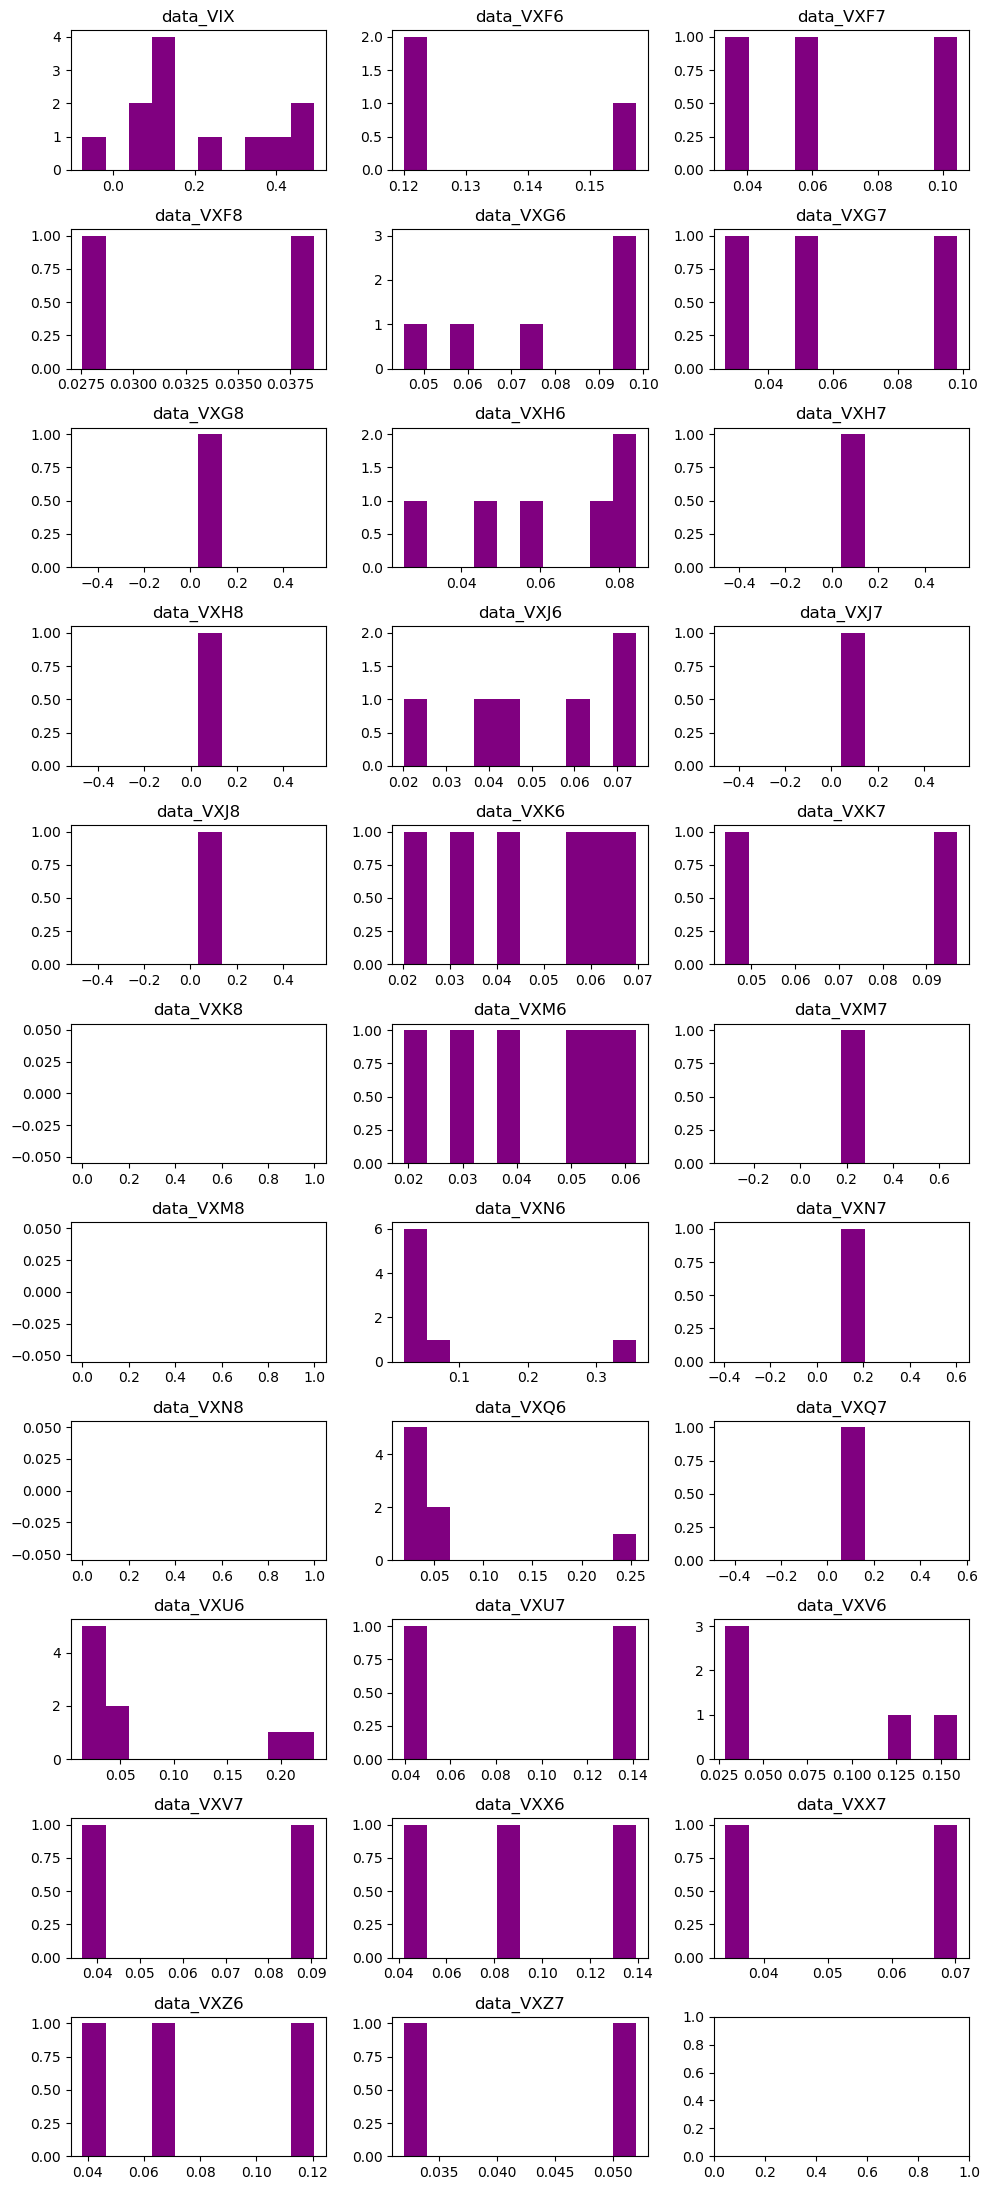

In [22]:
i=0
j=0
h=0
plt.style.use('default')
fig, axs = plt.subplots(11, 3, sharey=False, tight_layout=True, squeeze=False, figsize=(10,11*2))
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days.index)]['close_y']
    Y = Y.dropna()
    axs[i,j].hist(Y, color='purple')
    axs[i,j].set(title=data_tickers_list_names[h])
    j=j+1
    h=h+1
    if j == 3:
        j=0
        i=i+1

### Running OLS cross-sections regressions to  to determine how the VIX futures curve behaves in market selloff (threshhold defined above).

Thus, the dependent variable is SPX returns during the selloff and the independent variable is VIX & VIX future.

So, we have the following model:
    $$VIX\_returns = \beta_0 + \beta_1 SPX\_returns + u$$
    
or
    $$VIXFuture\_returns = \beta_0 + \beta_1 SPX\_returns + u$$

where, $$u \sim N(0, \sigma^2)$$

We also calculate the correlation between $$corr(SPX, VIX)$$ or $$corr(SPX, VIXFuture)$$.
In order to not show to many results, we decided to not print the regression tables.
We compiled all the estimated parameters, p-values, sample correlation in a single table/DataFrame.

In [23]:
cols = ['Correlation', 'Intercept', 'Slope-beta_1', 'Intercept [p-value]', 'Slope-beta_1 [p-value]', 'R2', 'F-test p-value']
lst = []       
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days.index)]['close_y']
    Y = Y.dropna()
    X = data_SPX[data_SPX.index.isin(Y.index)]['returns_close']
    my_corr = np.corrcoef(X,Y)[0,1]
    if len(X)>=2:
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
#        print(results.summary())
    
    lst.append([my_corr, results.params[0], results.params[1], 
                results.pvalues[0], results.pvalues[1], 
                results.rsquared, results.f_pvalue])

Regression_results_extended = pd.DataFrame(lst, columns=cols)
Regression_results_extended.index =data_tickers_list_names
print(Regression_results_extended) 

           Correlation  Intercept  Slope-beta_1  Intercept [p-value]  \
data_VIX     -0.490571  -0.098833    -14.643327             0.588558   
data_VXF6    -0.086530   0.111461     -0.940683             0.737020   
data_VXF7    -0.999822  -0.038052     -3.986356             0.034018   
data_VXF8     1.000000   0.099302      3.979326                  NaN   
data_VXG6    -0.834666  -0.026100     -5.097892             0.495096   
data_VXG7    -0.999998  -0.045854     -4.027817             0.002995   
data_VXG8          NaN  -0.045854     -4.027817             0.002995   
data_VXH6    -0.789998  -0.040897     -5.011964             0.367090   
data_VXH7          NaN  -0.040897     -5.011964             0.367090   
data_VXH8          NaN  -0.040897     -5.011964             0.367090   
data_VXJ6    -0.786174  -0.040581     -4.541044             0.333658   
data_VXJ7          NaN  -0.040581     -4.541044             0.333658   
data_VXJ8          NaN  -0.040581     -4.541044             0.33

A quick inspection on this table we see that the slope $\beta_1$ is negative for almost all indices. Even if we filter only for those cases where we statistically significant estimates for the slope and/or parameters, this behavior does not change.

Therefore, we can say that, during the days of market selloff, what we see is that VIX and VIX Futures respond on the other direction. This means that, the higher is the market selloff (i.e., the smaller is the SPX return in a given day - selloff day), the VIX and VIX Futures move on the opposite direction. The estimated $\beta_1$ will give the responsiveness.

## (2) Analysis - Behavior of VIX and VIX Futures for the same day and 5 following of a market selloff

Since we don't have that many datapoints for selloff days and also because we want to analyze how the SPX selloff affect VIX and VIX futures in the following days, we will consider up to 5 days of trading after the selloff.

In [24]:
market_selloff_days_plus1 = market_selloff_days.index + pd.DateOffset(1)
market_selloff_days_plus1 = pd.DataFrame(data_SPX[data_SPX.index.isin(market_selloff_days_plus1)]['returns_close'])
       
market_selloff_days_plus2 = market_selloff_days.index + pd.DateOffset(2)
market_selloff_days_plus2 = pd.DataFrame(data_SPX[data_SPX.index.isin(market_selloff_days_plus2)]['returns_close'])
   
market_selloff_days_plus3 = market_selloff_days.index + pd.DateOffset(3)
market_selloff_days_plus3 = pd.DataFrame(data_SPX[data_SPX.index.isin(market_selloff_days_plus3)]['returns_close'])
   
market_selloff_days_plus4 = market_selloff_days.index + pd.DateOffset(4)   
market_selloff_days_plus4 = pd.DataFrame(data_SPX[data_SPX.index.isin(market_selloff_days_plus4)]['returns_close'])

market_selloff_days_plus5 = market_selloff_days.index + pd.DateOffset(5)   
market_selloff_days_plus5 = pd.DataFrame(data_SPX[data_SPX.index.isin(market_selloff_days_plus5)]['returns_close'])

market_selloff_days_plus_extended = pd.concat([market_selloff_days_plus1, 
                                               market_selloff_days_plus2,
                                               market_selloff_days_plus3, 
                                               market_selloff_days_plus4,
                                               market_selloff_days_plus5])

### Plotting the SPX returns on x-axis and VIX & VIX Futures returns on the y-axis for the days in which the SPX had a selloff (threshhold defined above)

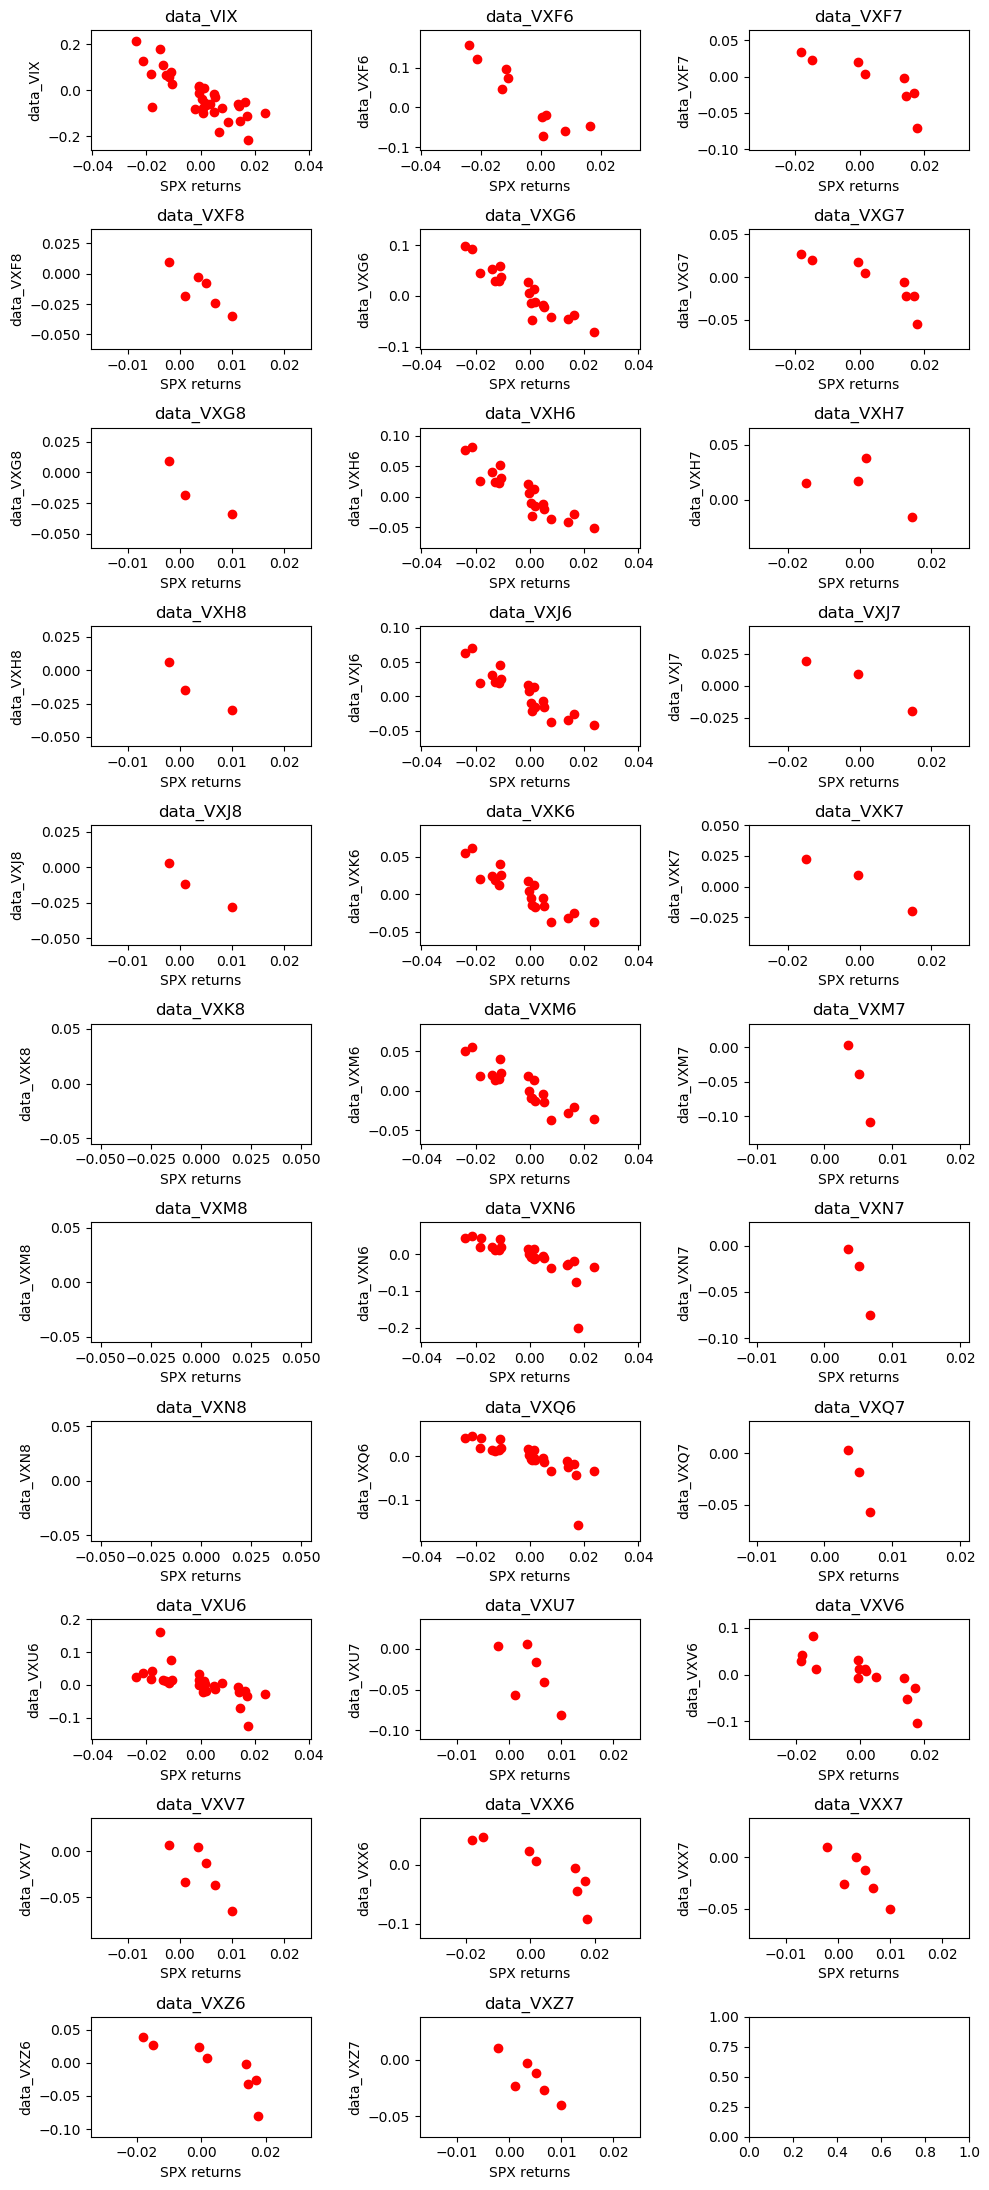

In [25]:
i=0
j=0
h=0
plt.style.use('default')
fig, axs = plt.subplots(11, 3, sharey=False, tight_layout=True, squeeze=False, figsize=(10,11*2))
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days_plus_extended.index)]['close_y']
    Y = Y.dropna()
    X = data_SPX[data_SPX.index.isin(Y.index)]['returns_close']
    axs[i,j].scatter(X,Y, c='red')
    axs[i,j].set(title=data_tickers_list_names[h],
                 ylabel=data_tickers_list_names[h],
                 xlabel='SPX returns')
    j=j+1
    h=h+1
    if j == 3:
        j=0
        i=i+1

Notice that the negative relationship between SPX and VIX/VIX Futures mentioned above is more evident now.

### Plotting the histograms of VIX & VIX Futures returns for the days in which the SPX had a selloff (threshhold defined above)

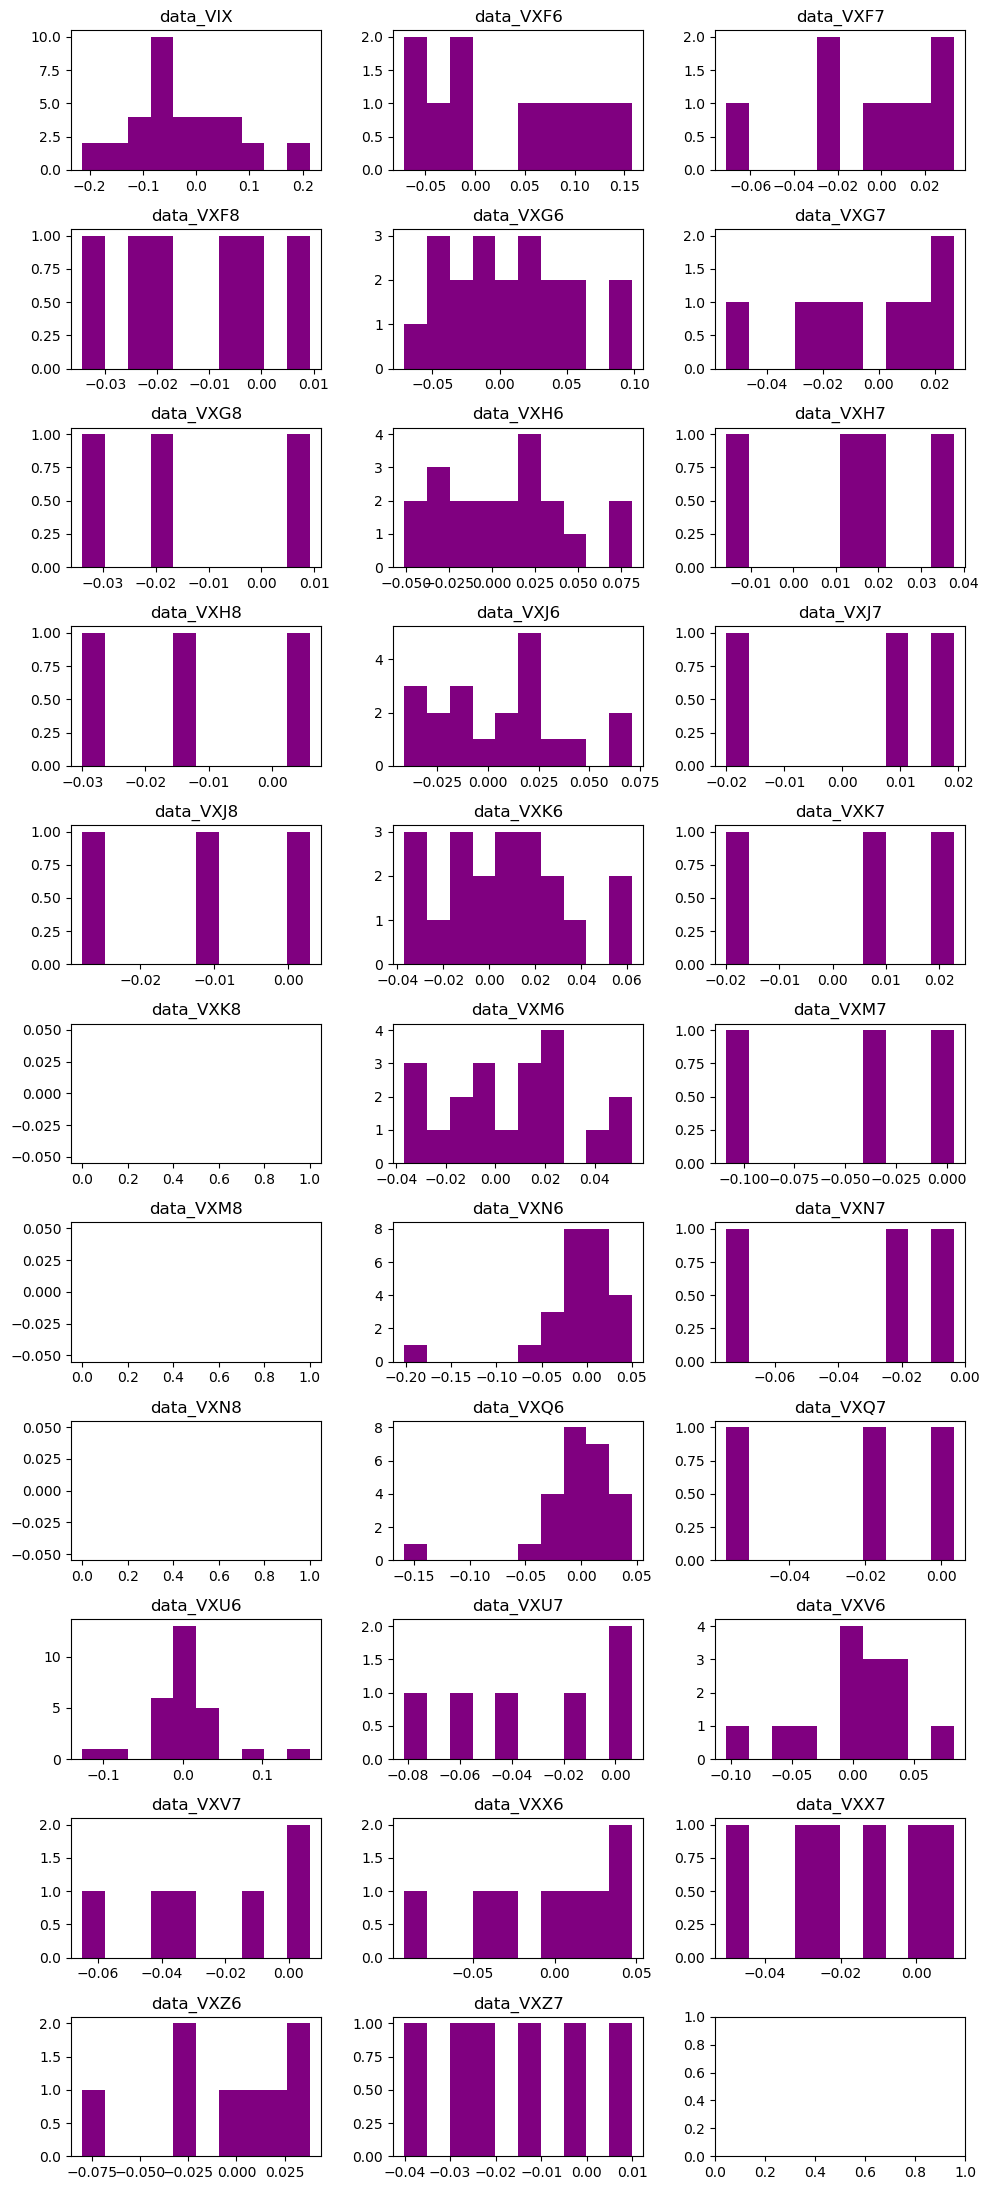

In [26]:
i=0
j=0
h=0
plt.style.use('default')
fig, axs = plt.subplots(11, 3, sharey=False, tight_layout=True, squeeze=False, figsize=(10,11*2))
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days_plus_extended.index)]['close_y']
    Y = Y.dropna()
    axs[i,j].hist(Y, color='purple')
    axs[i,j].set(title=data_tickers_list_names[h])
    j=j+1
    h=h+1
    if j == 3:
        j=0
        i=i+1

### Running OLS cross-sections regressions to  to determine how the VIX futures curve behaves in market selloff (threshhold defined above).

Again, the dependent variable is SPX returns during the selloff (extend up to five days of the fall) and the independent variable is VIX & VIX future.

We have the same model above, but with more observations since we added the following five days after the selloff.
Thus, the model is given by:

    $$VIX\_returns = \beta_0 + \beta_1 SPX\_returns + u$$
    
or
    $$VIXFuture\_returns = \beta_0 + \beta_1 SPX\_returns + u$$

where, $$u \sim N(0, \sigma^2)$$

We also calculate the correlation between $$corr(SPX, VIX)$$ or $$corr(SPX, VIXFuture)$$.
In order to not show to many results, we decided to not print the regression tables.
We compiled all the estimated parameters, p-values, sample correlation in a single table/DataFrame.

In [27]:
cols = ['Correlation', 'Intercept', 'Slope-beta_1', 'Intercept [p-value]', 'Slope-beta_1 [p-value]', 'R2', 'F-test p-value']
lst = []       
for df in data_tickers_list:
    Y = df[df.index.isin(market_selloff_days_plus_extended.index)]['close_y']
    Y = Y.dropna()
    X = data_SPX[data_SPX.index.isin(Y.index)]['returns_close']
    my_corr = np.corrcoef(X,Y)[0,1]
    if len(X)>=2:
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
#        print(results.summary())
    
    lst.append([my_corr, results.params[0], results.params[1], 
                results.pvalues[0], results.pvalues[1], 
                results.rsquared, results.f_pvalue])

Regression_results_extended = pd.DataFrame(lst, columns=cols)
Regression_results_extended.index =data_tickers_list_names
print(Regression_results_extended)

           Correlation  Intercept  Slope-beta_1  Intercept [p-value]  \
data_VIX     -0.799811  -0.023471     -6.302359             0.027046   
data_VXF6    -0.918544  -0.003367     -5.851361             0.784109   
data_VXF7    -0.835527   0.002413     -1.988762             0.756400   
data_VXF8    -0.826004  -0.000484     -3.075870             0.938365   
data_VXG6    -0.930760   0.001083     -3.432838             0.792361   
data_VXG7    -0.869077   0.002072     -1.667615             0.714085   
data_VXG8    -0.910949  -0.004731     -3.170734             0.677351   
data_VXH6    -0.915819   0.000890     -2.703091             0.805484   
data_VXH7    -0.505888   0.013628     -0.926556             0.362118   
data_VXH8    -0.936086  -0.004800     -2.697033             0.571204   
data_VXJ6    -0.907887   0.000956     -2.268073             0.764780   
data_VXJ7    -0.964693   0.002482     -1.343445             0.672708   
data_VXJ8    -0.971761  -0.004973     -2.389530             0.38

Here we have even stronger results!

# Model 2

For the model 2 we decided to do the analysis straight with the sample that consider the selloff day plus the 5 following trading days.
The reason is because, doing so we will obtain more robust results with a larger sample

### Plotting the VIX returns on x-axis and VIX Futures returns on the y-axis for the days in which the SPX had a selloff (threshhold defined above)

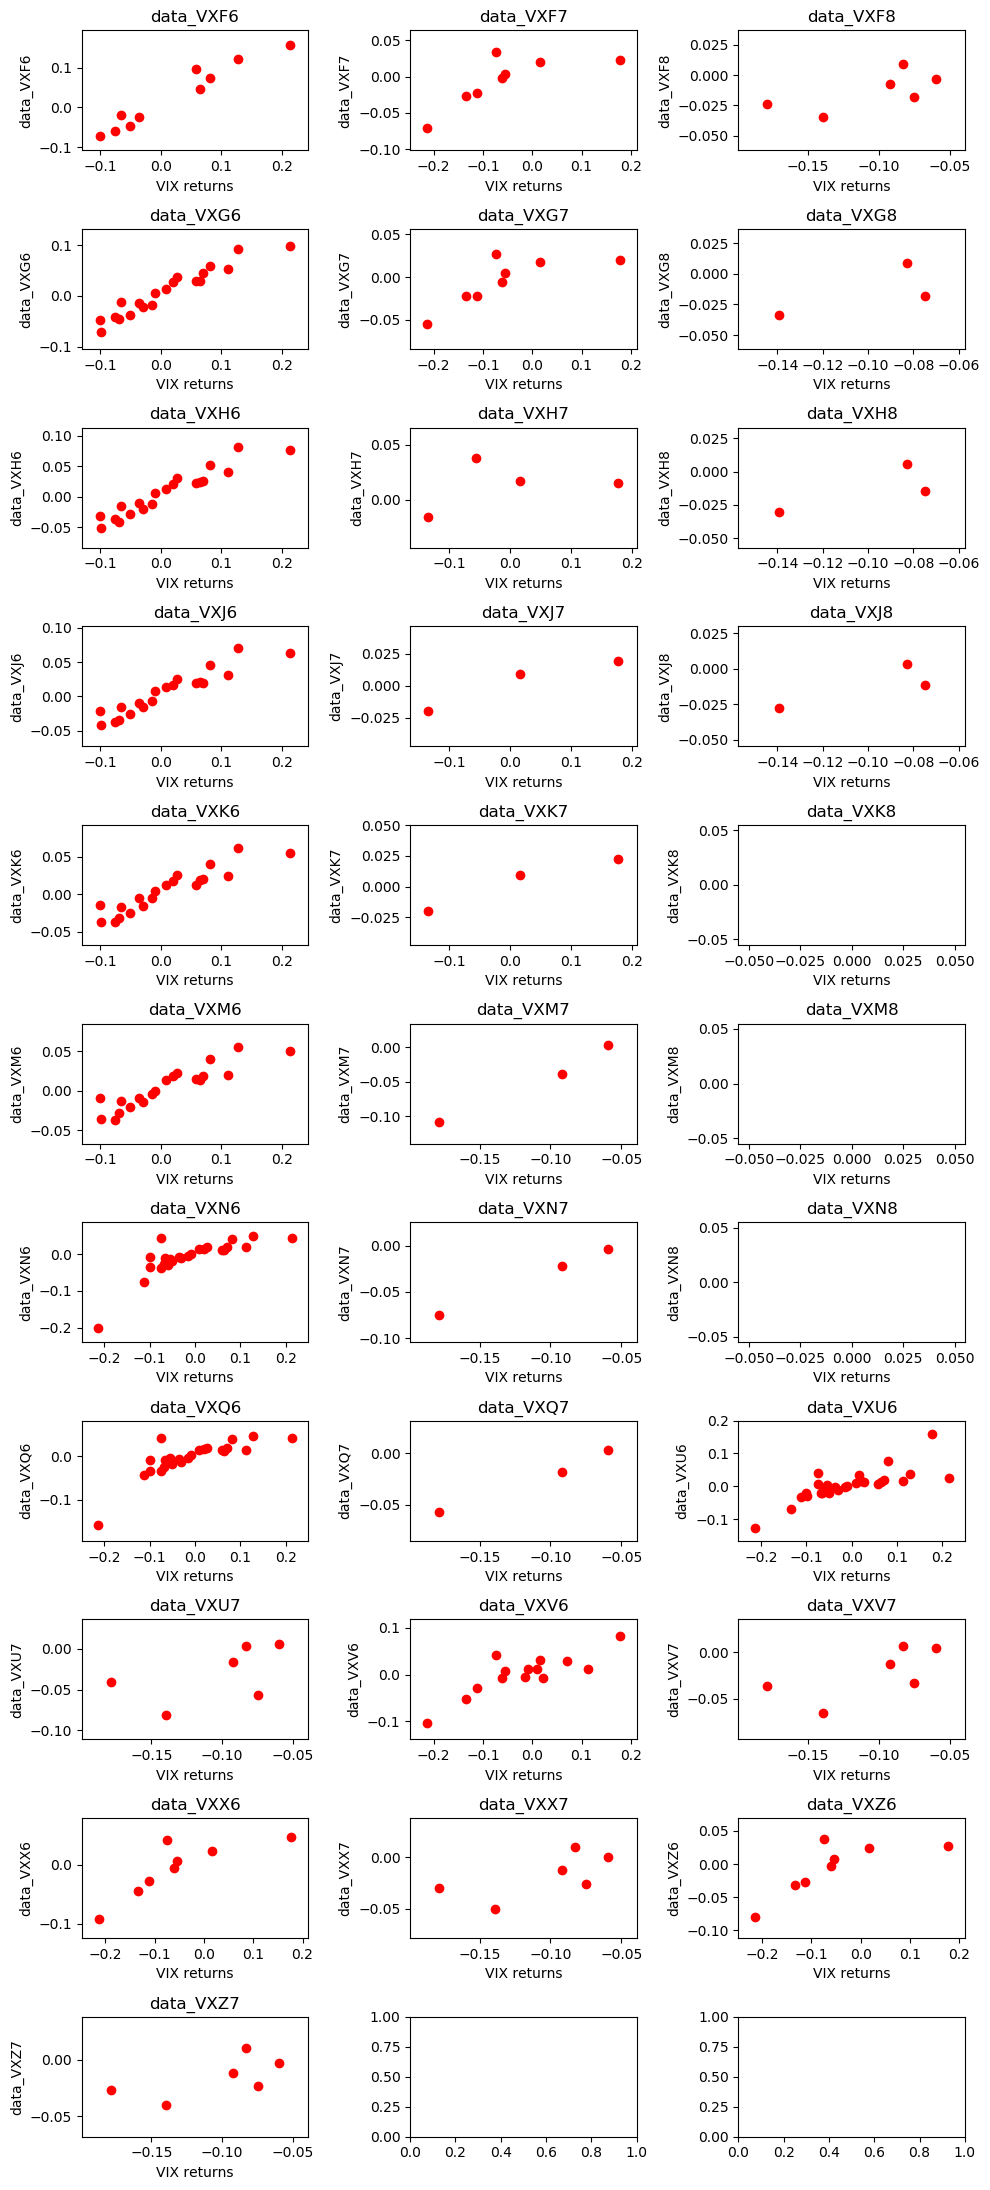

In [28]:
i=0
j=0
h=0
plt.style.use('default')
fig, axs = plt.subplots(11, 3, sharey=False, tight_layout=True, squeeze=False, figsize=(10,11*2))
for df in data_tickers_list[1:(len(data_tickers_list)+1)]:
    Y = df[df.index.isin(market_selloff_days_plus_extended.index)]['close_y']
    Y = Y.dropna()
    X = data_VIX[data_VIX.index.isin(Y.index)]['close_y']
    axs[i,j].scatter(X,Y, c='red')
    axs[i,j].set(title=data_tickers_list_names[h+1],
                 ylabel=data_tickers_list_names[h+1],
                 xlabel='VIX returns')
    j=j+1
    h=h+1
    if j == 3:
        j=0
        i=i+1

Now we can see a clear pattern, in the opposite direction when compared to the model 1.
We see that VIX and VIX Futures have a positive relationship during selloffs (again selloff day plus 5 following days).

### Running OLS cross-sections regressions to  to determine how the VIX futures curve behaves in market selloff (threshhold defined above).

Thus, the dependent variable is SPX returns during the selloff (extend up to five days of the fall) and the independent variable is VIX & VIX future.

So, we have the following model:
    $$VIXFuture\_returns = \beta_0 + \beta_1 VIX\_returns + u$$

where, $$u \sim N(0, \sigma^2)$$


In [29]:
cols = ['Correlation', 'Intercept', 'Slope-beta_1', 'Intercept [p-value]', 'Slope-beta_1 [p-value]', 'R2', 'F-test p-value']
lst = []       
for df in data_tickers_list[1:(len(data_tickers_list)+1)]:
    Y = df[df.index.isin(market_selloff_days_plus_extended.index)]['close_y']
    Y = Y.dropna()
    X = data_VIX[data_VIX.index.isin(Y.index)]['close_y']
    my_corr = np.corrcoef(X,Y)[0,1]
    if len(X)>=2:
        X = sm.add_constant(X)
        model = sm.OLS(Y,X)
        results = model.fit()
    #   print(results.summary())
    
    lst.append([my_corr, results.params[0], results.params[1], 
                results.pvalues[0], results.pvalues[1], 
                results.rsquared, results.f_pvalue])

Regression_results_extended = pd.DataFrame(lst, columns=cols)
Regression_results_extended.index =data_tickers_list_names[1:(len(data_tickers_list)+1)]
print(Regression_results_extended)

           Correlation  Intercept  Slope-beta_1  Intercept [p-value]  \
data_VXF6     0.973316   0.010554      0.777807             0.142532   
data_VXF7     0.750094   0.007179      0.219790             0.487125   
data_VXF8     0.677977   0.011810      0.236575             0.459092   
data_VXG6     0.961434   0.002797      0.547041             0.367562   
data_VXG7     0.763090   0.005837      0.180253             0.473833   
data_VXG8     0.703530   0.028938      0.436000             0.639163   
data_VXH6     0.950420   0.002216      0.432764             0.428854   
data_VXH7     0.326528   0.013359      0.054277             0.404600   
data_VXH8     0.748706   0.025149      0.384078             0.604257   
data_VXJ6     0.939709   0.002080      0.362162             0.425099   
data_VXJ7     0.954645   0.000375      0.125342             0.952648   
data_VXJ8     0.823389   0.023566      0.360492             0.526928   
data_VXK6     0.923917   0.001654      0.317208             0.52

Eye inspecting this table we see that the slope $\beta_1$ is **POSITIVE** for **ALL** indices. Even if we filter only for those cases where we statistically significant estimates for the slope and/or parameters, this behavior does not change.

Therefore, we can say that, during the days of market selloff, what we see is that VIX Futures respond on the **SAME** direction of the movement of VIX.

# Time Series Analysis

Unfortunately, when analysing selloff periods we don't obtain large sample with consecutive time observations.
If so, we could run some time series econometrics. As a quick view, we could for instance fit an ARMA or ARIMA depending of the stationarity of the variables.

Below we I do a quick analysis for the VIX. We see that it can be, without calculating the differences (no integrated component), an AR(1).

In [30]:
from scipy import stats

array([ 1.        ,  0.95048411,  0.08267958,  0.02073556,  0.00906676,
        0.05612589, -0.0065927 ,  0.07877906,  0.01142009,  0.03498189,
        0.01173815,  0.01649669,  0.01417494,  0.06926665,  0.00184427,
        0.00683112])

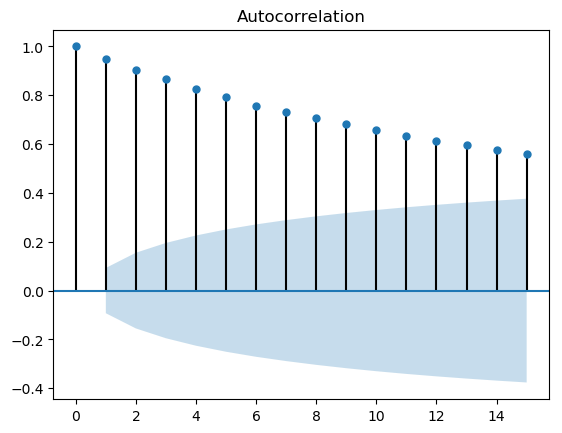

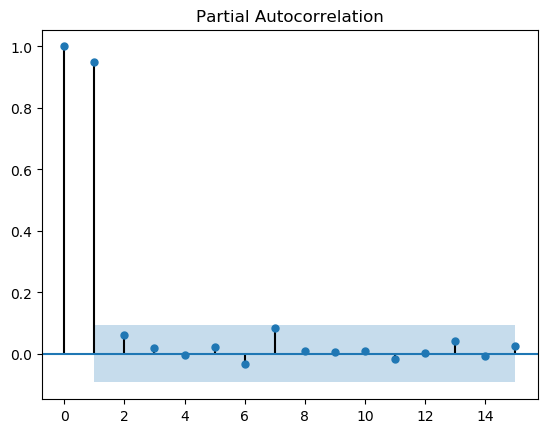

In [31]:
sm.graphics.tsa.plot_acf(data_VIX['close_x'], lags=15)
sm.graphics.tsa.plot_pacf(data_VIX['close_x'], lags=15)
sm.tsa.stattools.pacf_ols(data_VIX['close_x'], nlags=15)

In [32]:
arma_mod = sm.tsa.ARMA(data_VIX['close_x'], (2,0)).fit(disp=False)
print(arma_mod.params)

const            13.860356
ar.L1.close_x     0.872172
ar.L2.close_x     0.083173
dtype: float64


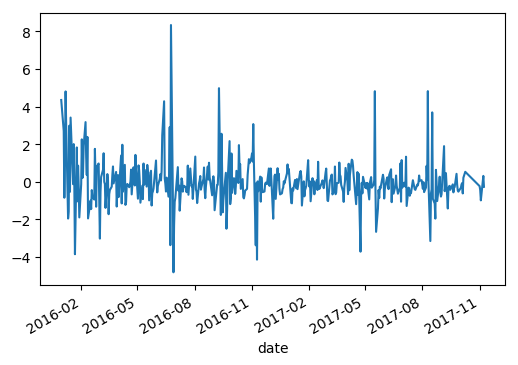

In [33]:
fig, axs = plt.subplots(1, figsize=(6,4))
arma_mod.resid.plot(ax=axs)

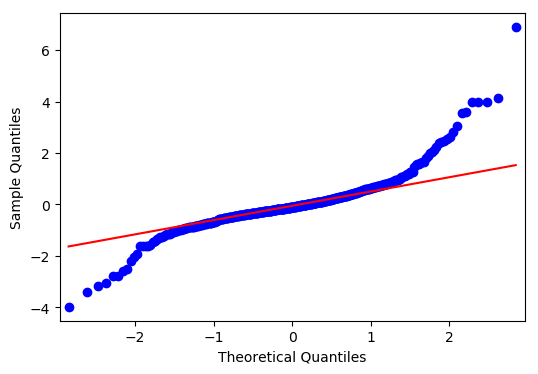

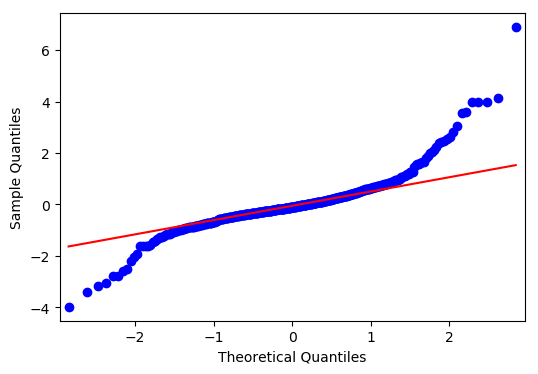

In [34]:
resid = arma_mod.resid
stats.normaltest(resid)
fig, axs = plt.subplots(1, figsize=(6,4))
sm.graphics.qqplot(resid, line='q', ax=axs, fit=True)